In [1]:
!pip install ydata_profiling
!pip install missingno
!pip install colorama
!pip install gdown

In [2]:
import os
import gdown

# URL to the dataset file on Google Drive
url = 'https://drive.google.com/uc?id=1Fa_Yq0NainCkWF7WYGCndWk6V8MsUWr9'

# Directory where you want to save the dataset
data_dir = 'data'

# Create the directory if it doesn't exist
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Path to save the dataset
file_path = os.path.join(data_dir, 'autos.csv')

# Download the dataset file
gdown.download(url, file_path, quiet=False)

print("Dataset downloaded and saved successfully.")

Downloading...
From: https://drive.google.com/uc?id=1Fa_Yq0NainCkWF7WYGCndWk6V8MsUWr9
To: /teamspace/studios/this_studio/Supervised_Task/data/autos.csv
100%|██████████| 71.0M/71.0M [00:00<00:00, 102MB/s] 


Dataset downloaded and saved successfully.


In [3]:
#importing the libraries
import ydata_profiling #provide a one-line Exploratory Data Analysis (EDA)
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder

from colorama import Fore, Back, Style
%matplotlib inline

In [4]:
#importing the dataset
df=pd.read_csv("data/autos.csv")

#checking the head of the data
df.head()

index          dateCrawled                            name  seller  \
0      0  2016-03-24 11:52:17                      Golf_3_1.6  privat   
1      1  2016-03-24 10:58:45            A5_Sportback_2.7_Tdi  privat   
2      2  2016-03-14 12:52:21  Jeep_Grand_Cherokee_"Overland"  privat   
3      3  2016-03-17 16:54:04              GOLF_4_1_4__3TÜRER  privat   
4      4  2016-03-31 17:25:20  Skoda_Fabia_1.4_TDI_PD_Classic  privat   

  offerType  price abtest vehicleType  yearOfRegistration    gearbox  ...  \
0   Angebot    480   test         NaN                1993    manuell  ...   
1   Angebot  18300   test       coupe                2011    manuell  ...   
2   Angebot   9800   test         suv                2004  automatik  ...   
3   Angebot   1500   test  kleinwagen                2001    manuell  ...   
4   Angebot   3600   test  kleinwagen                2008    manuell  ...   

   model kilometer  monthOfRegistration  fuelType       brand  \
0   golf    150000                    0    benzin  volkswagen   
1    NaN    125000                    5    diesel        audi   
2  grand    125000                    8    diesel        jeep   
3   golf    150000                    6    benzin  volkswagen   
4  fabia     90000                    7    diesel       skoda   

  notRepairedDamage          dateCreated nrOfPictures  postalCode  \
0               NaN  2016-03-24 00:00:00            0       70435   
1                ja  2016-03-24 00:00:00            0       66954   
2               NaN  2016-03-14 00:00:00            0       90480   
3              nein  2016-03-17 00:00:00            0       91074   
4              nein  2016-03-31 00:00:00            0       60437   

              lastSeen  
0  2016-04-07 03:16:57  
1  2016-04-07 01:46:50  
2  2016-04-05 12:47:46  
3  2016-03-17 17:40:17  
4  2016-04-06 10:17:21  

[5 rows x 21 columns]

In [5]:
#checking the info and if there is any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

<Axes: >

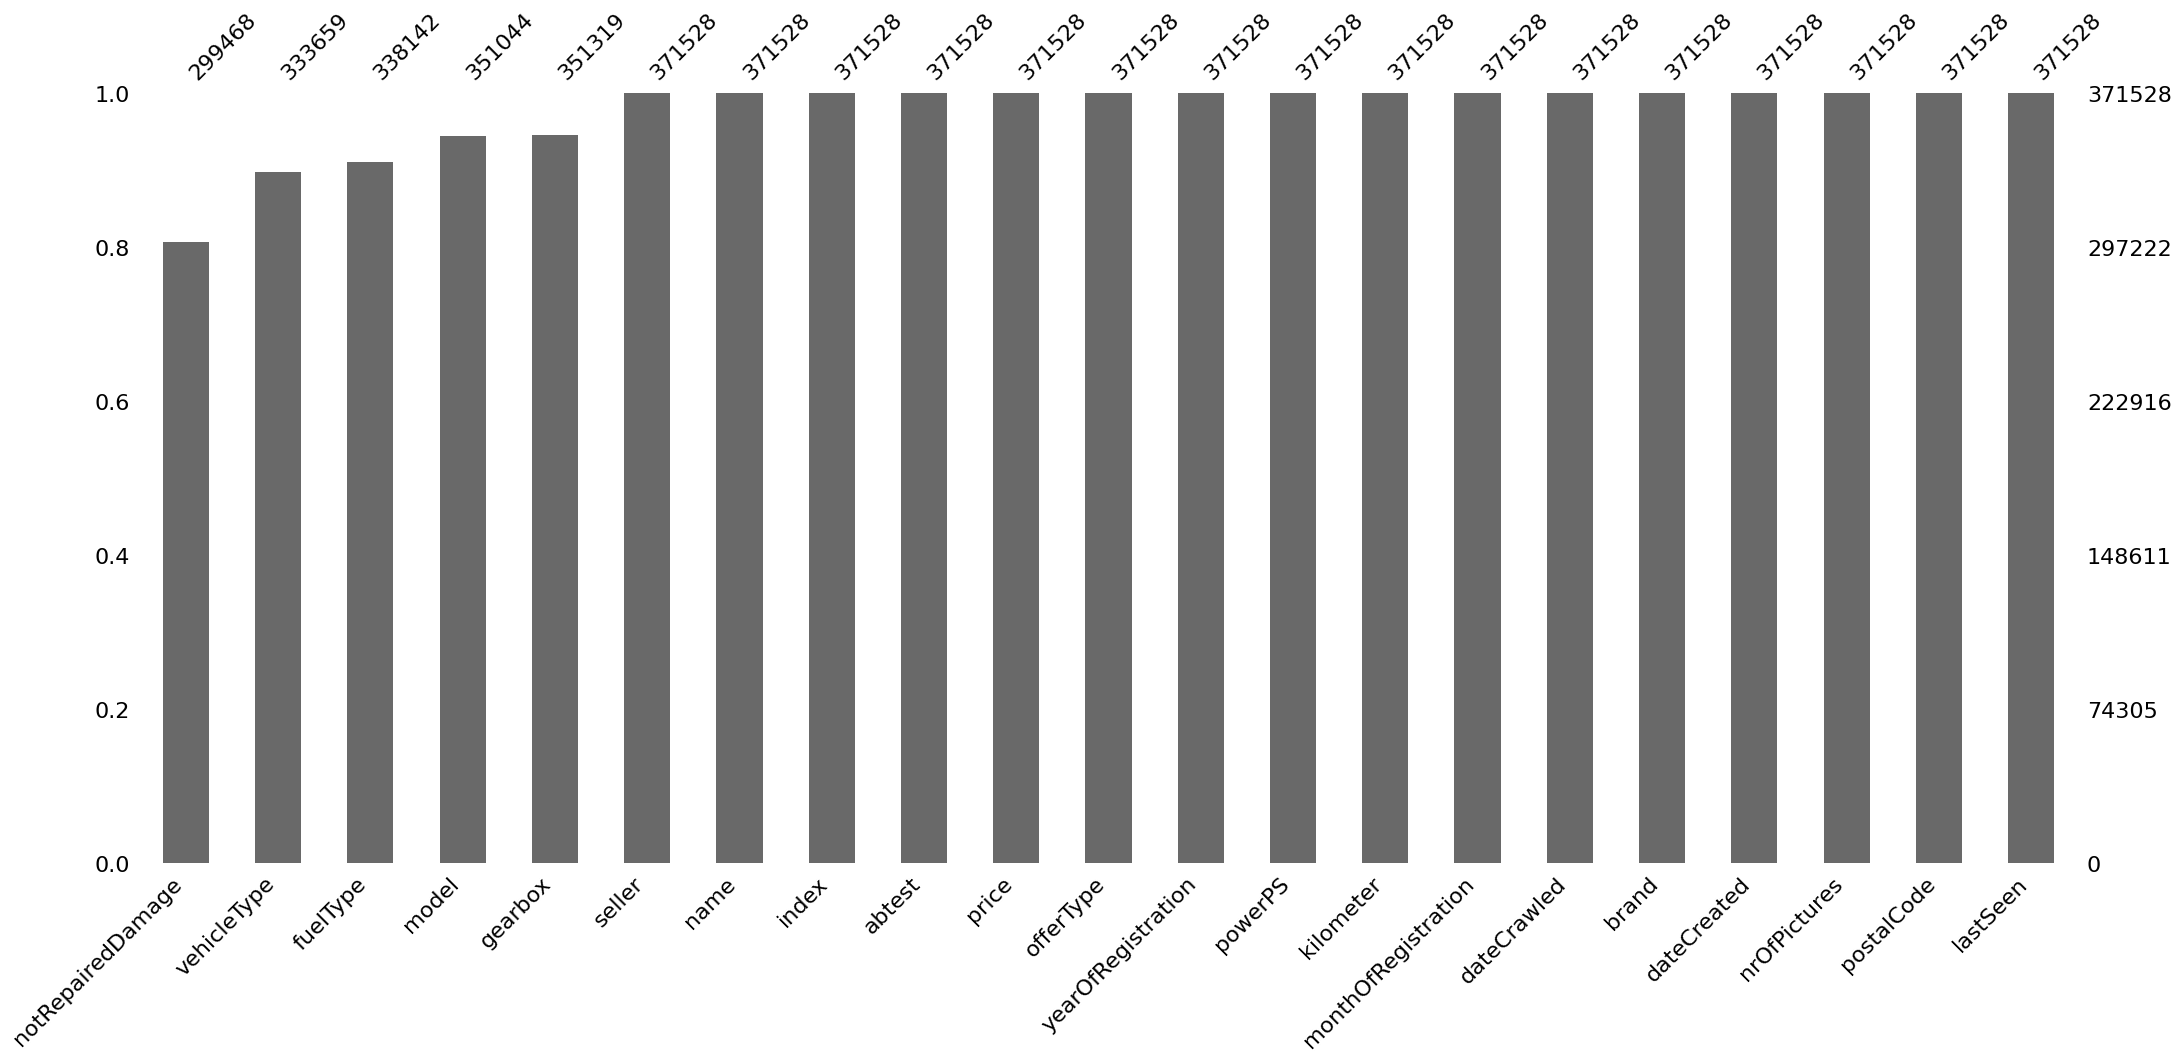

In [6]:
#visualizing missing data in datasets : generating a bar chart where 
#the columns with the least missing values will be on the left, 
#and those with the most missing values will be on the right
msno.bar(df, sort='ascending')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

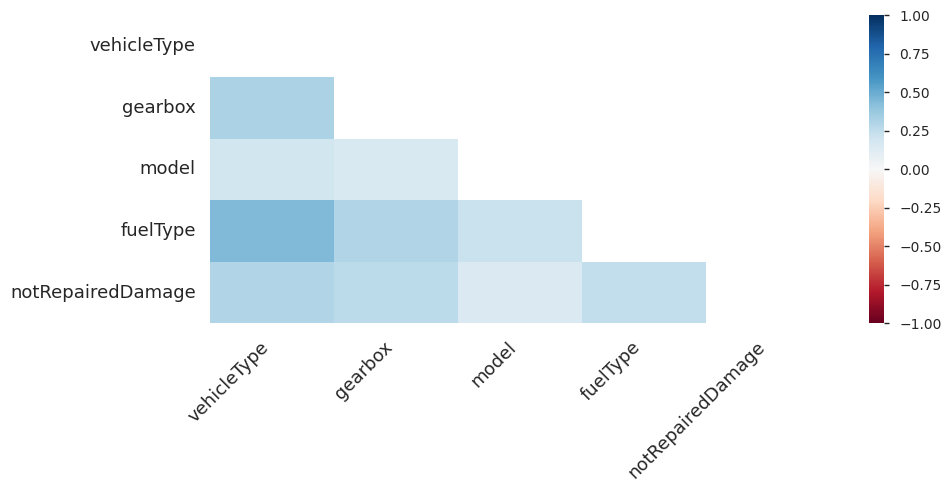

In [7]:
# Generate a detailed report on the DataFrame 'df' using the pandas_profiling library
# This report includes statistics, summaries, and visualizations to understand the dataset
ydata_profiling.ProfileReport(df)

In [8]:
#analyzing features
df['yearOfRegistration'].value_counts()

yearOfRegistration
2000    24551
1999    22767
2005    22316
2006    20230
2001    20218
        ...  
1253        1
1919        1
7777        1
5600        1
3500        1
Name: count, Length: 155, dtype: int64

In [9]:
print(f"No. of all cars registered: {Style.BRIGHT}{len(df['yearOfRegistration'])}")
print(f"{Style.RESET_ALL}No. of cars registered before 1990: {Style.BRIGHT}{len(df[df['yearOfRegistration'] <= 1989])}")
print(f"{Style.RESET_ALL}No. of cars registered after 2024: {Style.BRIGHT}{len(df[df['yearOfRegistration'] >= 2025])}")
print(f"{Style.RESET_ALL}No. of cars registered between (1990 - 2024): {Style.BRIGHT}{len(df[df['yearOfRegistration'].between(1990, 2024)])}")

No. of all cars registered: 371528
No. of cars registered before 1990: 10611
No. of cars registered after 2024: 114
No. of cars registered between (1990 - 2024): 360803


In [10]:
#column labels
df.columns

Index(['df_index', 'dateCrawled', 'name', 'seller', 'offerType', 'price',
       'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [11]:
# DateTime Conversion
df['dateCreated'] = pd.to_datetime(df['dateCreated'])

# Drop the 'dateCrawled', 'lastSeen','nrOfPictures', 'seller', 'offerType' columns
df.drop(['lastSeen', 'dateCrawled','nrOfPictures','seller','offerType'], axis=1, inplace=True)

# Define a range for the 'yearOfRegistration'
df = df[df['yearOfRegistration'].between(1990, 2024)]

# Convert German terms to English
# Replace 'manuell' with 'Manual','automatik' with 'Automatic' and 'ja' with 'Yes', 'nein' with 'No' for respective columns
df.loc[df['gearbox'] == 'manuell', 'gearbox'] = 'Manual'
df.loc[df['gearbox'] == 'automatik', 'gearbox'] = 'Automatic'
df.loc[df['notRepairedDamage'] == 'ja', 'notRepairedDamage'] = 'Yes'
df.loc[df['notRepairedDamage'] == 'nein', 'notRepairedDamage'] = 'No'
# Replace 'benzin' with 'Petrol' and 'andere' with 'Other' for the fuelType column
df.loc[df['fuelType'] == 'benzin', 'fuelType'] = 'Petrol'
df.loc[df['fuelType'] == 'andere', 'fuelType'] = 'Other'

df.head()

df_index                            name  price abtest vehicleType  \
0         0                      Golf_3_1.6    480   test         NaN   
1         1            A5_Sportback_2.7_Tdi  18300   test       coupe   
2         2  Jeep_Grand_Cherokee_"Overland"   9800   test         suv   
3         3              GOLF_4_1_4__3TÜRER   1500   test  kleinwagen   
4         4  Skoda_Fabia_1.4_TDI_PD_Classic   3600   test  kleinwagen   

   yearOfRegistration    gearbox  powerPS  model  kilometer  \
0                1993     Manual        0   golf     150000   
1                2011     Manual      190    NaN     125000   
2                2004  Automatic      163  grand     125000   
3                2001     Manual       75   golf     150000   
4                2008     Manual       69  fabia      90000   

   monthOfRegistration fuelType       brand notRepairedDamage dateCreated  \
0                    0   Petrol  volkswagen               NaN  2016-03-24   
1                    5   diesel        audi               Yes  2016-03-24   
2                    8   diesel        jeep               NaN  2016-03-14   
3                    6   Petrol  volkswagen                No  2016-03-17   
4                    7   diesel       skoda                No  2016-03-31   

   postalCode  
0       70435  
1       66954  
2       90480  
3       91074  
4       60437

<Axes: title={'center': 'Bottom 10 Brands'}, xlabel='Brand', ylabel='Count'>

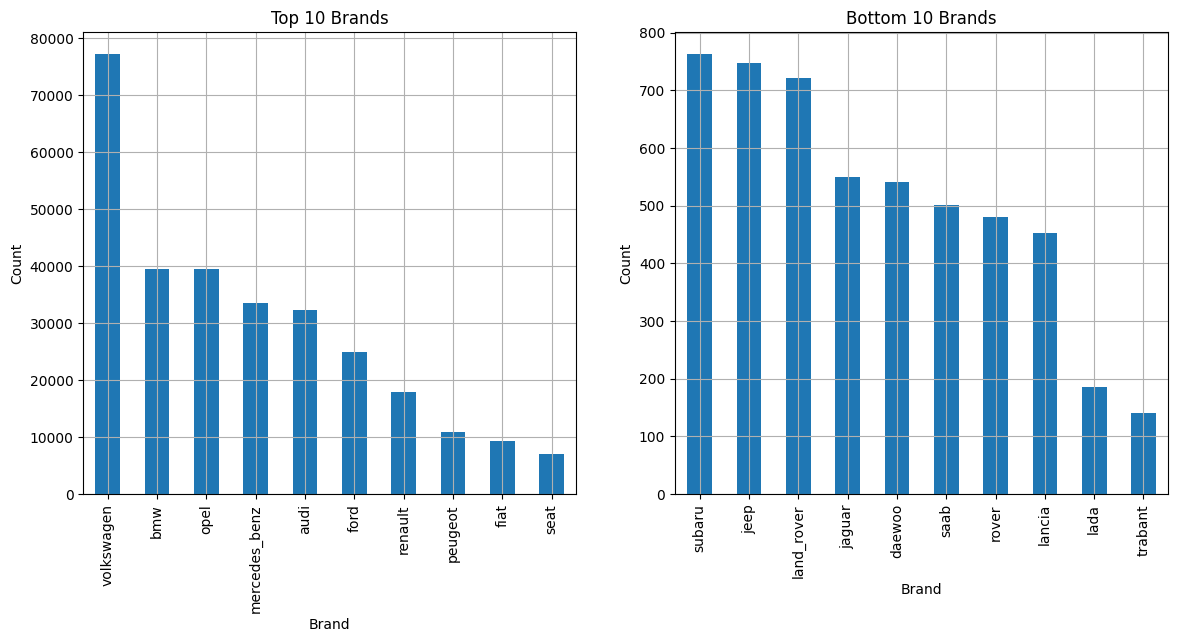

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

df['brand'].value_counts().head(10).plot(kind='bar', title='Top 10 Brands', ax=axes[0], xlabel='Brand', ylabel='Count', grid=True)
df['brand'].value_counts().tail(10).plot(kind='bar', title='Bottom 10 Brands', ax=axes[1], xlabel='Brand', ylabel='Count', grid=True)

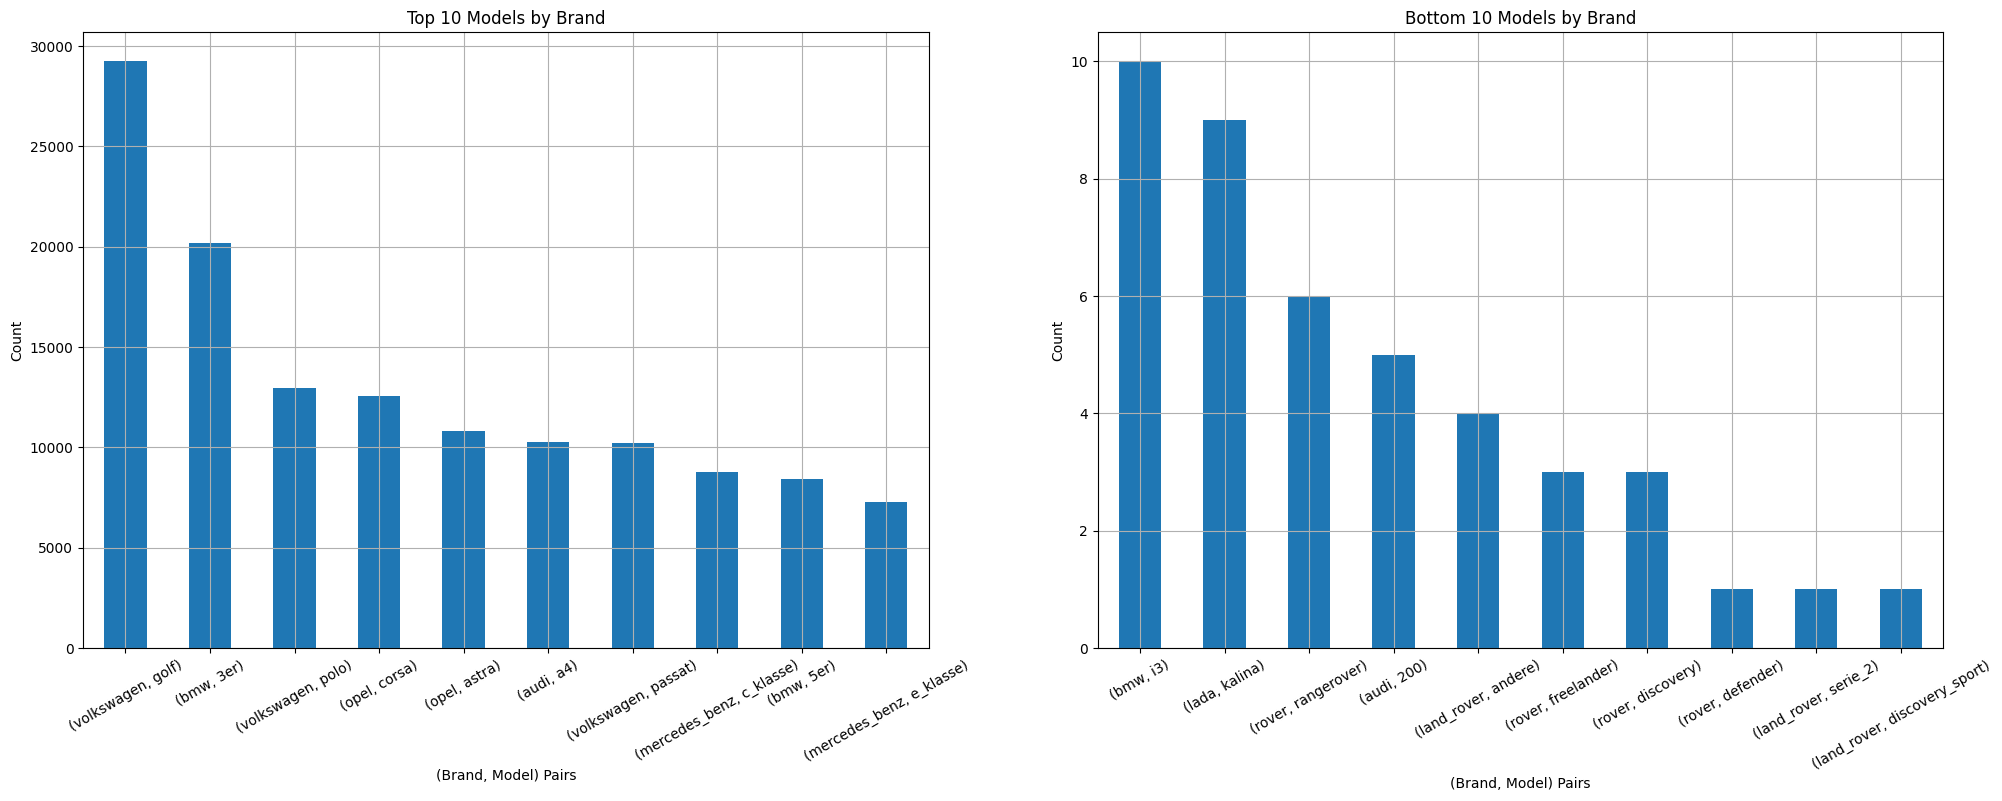

In [13]:
group_by_brand = df.groupby('brand')['model'].value_counts().sort_values(ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

group_by_brand.head(10).plot(kind='bar', grid=True, rot=30, xlabel="(Brand, Model) Pairs", ylabel='Count', title='Top 10 Models by Brand', ax=axes[0])
group_by_brand.tail(10).plot(kind='bar', grid=True, rot=30, xlabel="(Brand, Model) Pairs", ylabel='Count', title='Bottom 10 Models by Brand', ax=axes[1])

plt.show()

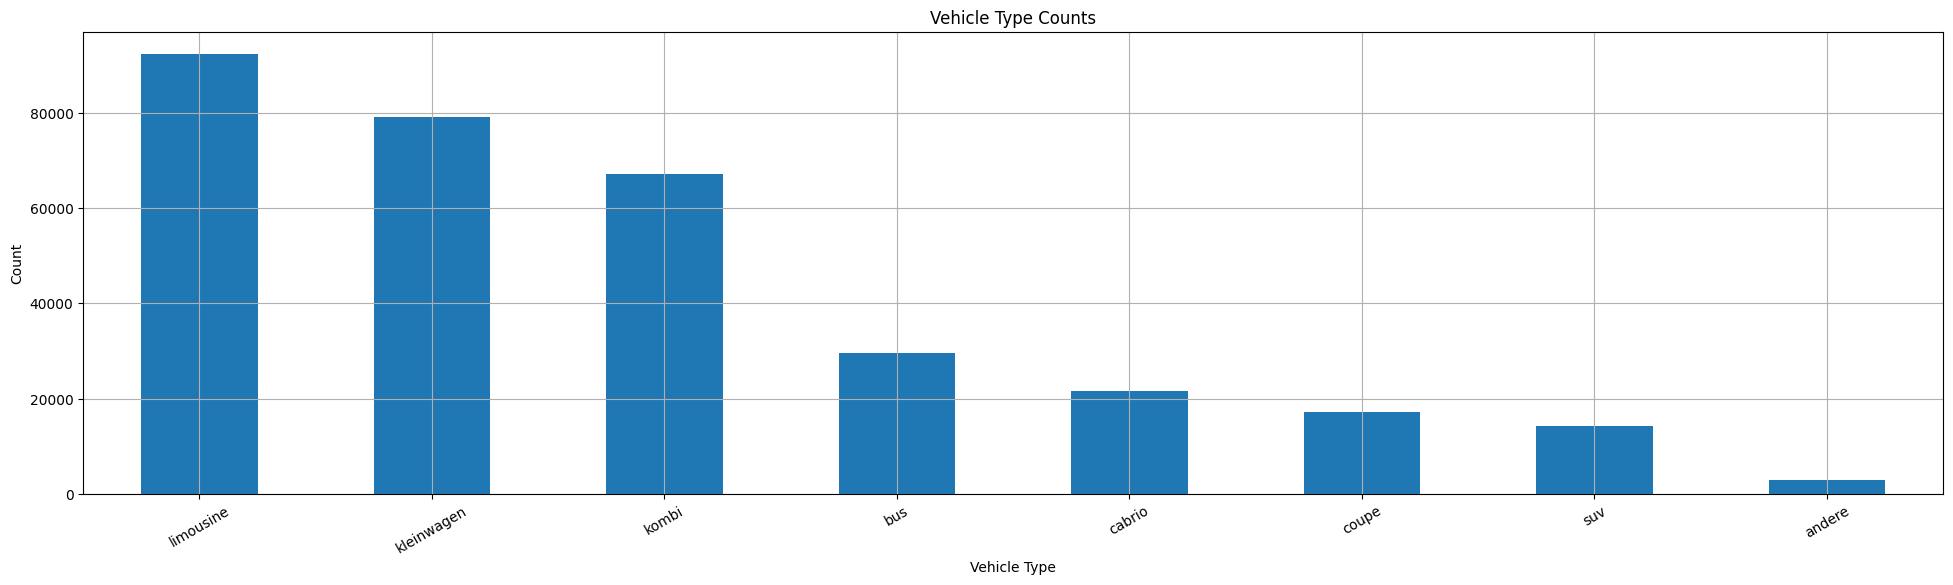

In [14]:
fig, axes = plt.subplots(figsize=(24, 6))
df['vehicleType'].value_counts().plot(kind='bar', ax=axes, grid=True, rot=30)
axes.set_xlabel('Vehicle Type')
axes.set_ylabel('Count')
axes.set_title('Vehicle Type Counts')

plt.show()

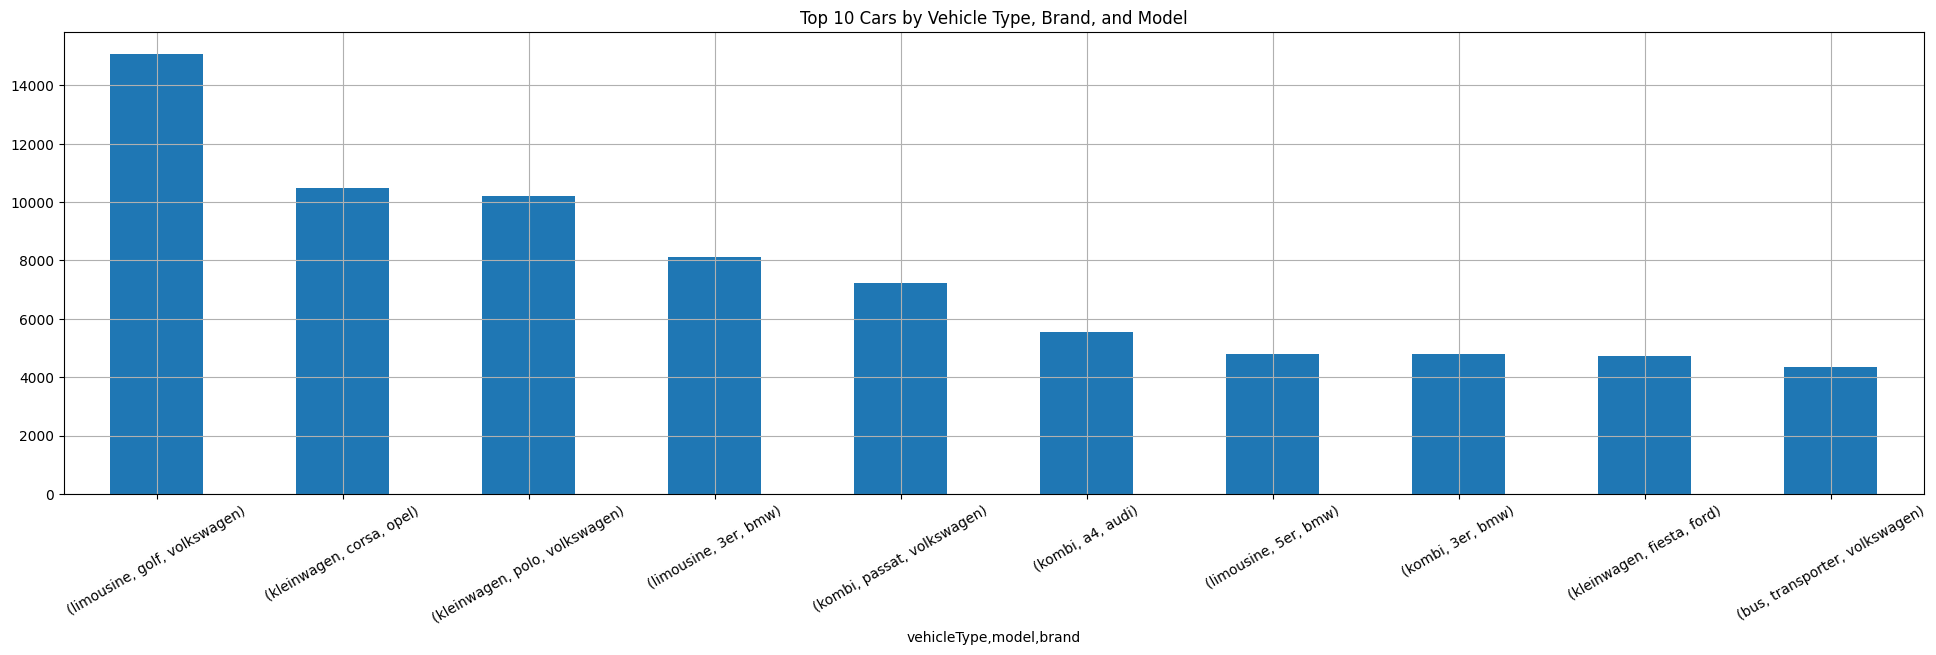

In [15]:
group_by_vehicle_type = df.groupby('vehicleType')[['model', 'brand']].value_counts().sort_values(ascending=False)

fig, axes = plt.subplots(figsize=(24, 6))
group_by_vehicle_type.head(10).plot(kind='bar', ax=axes, grid=True, rot=30)
axes.set_title('Top 10 Cars by Vehicle Type, Brand, and Model')

plt.show()

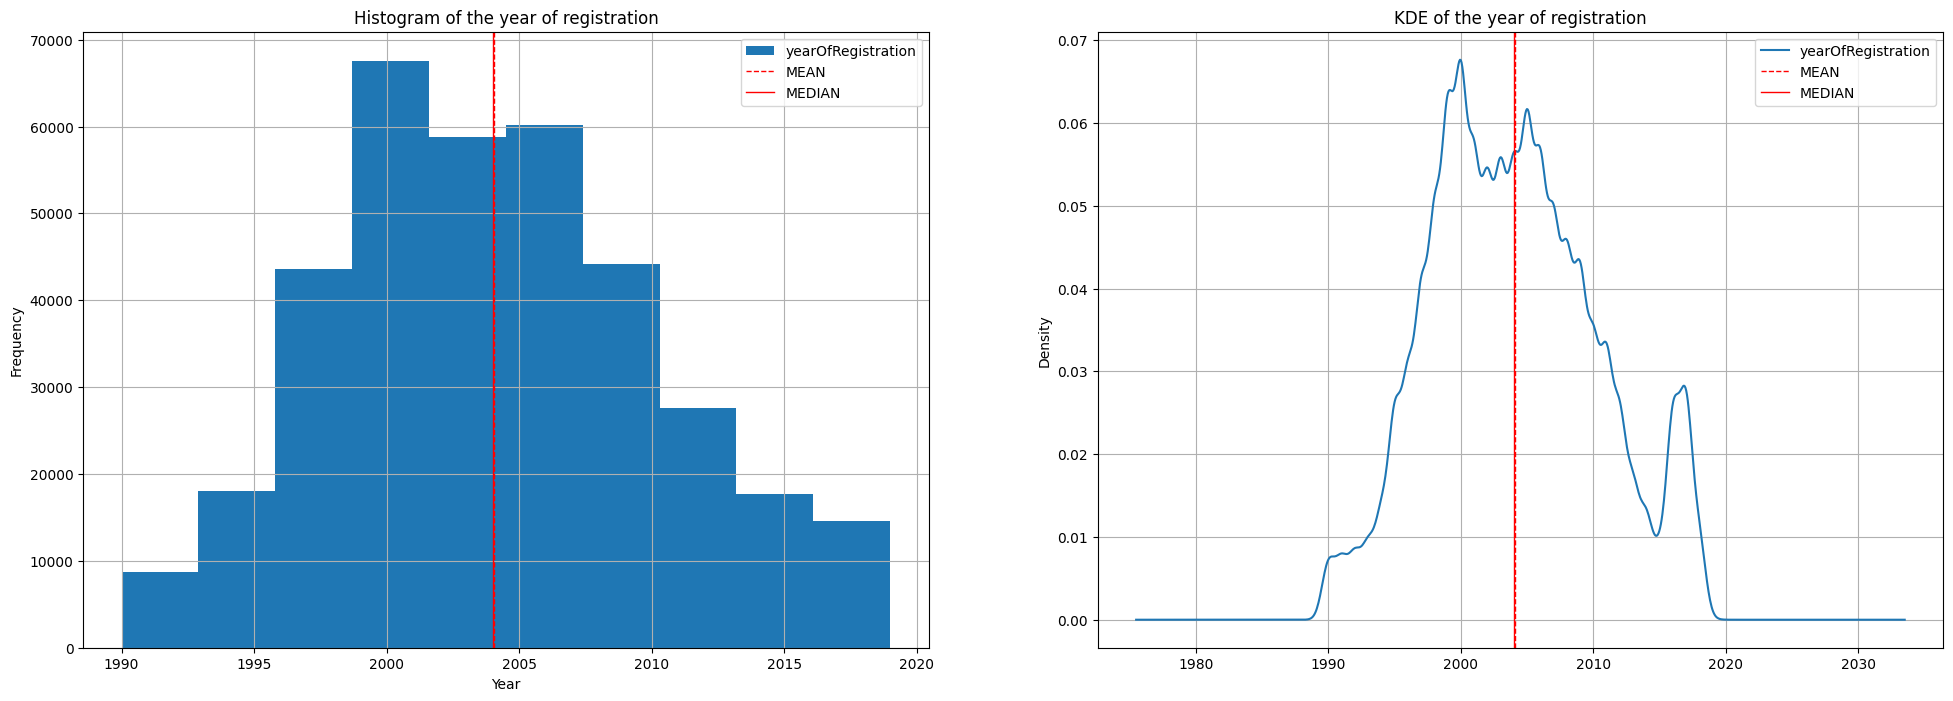

In [16]:
# Calculate mean and median of the 'yearOfRegistration' column
yr_mean = df['yearOfRegistration'].mean()
yr_median = df['yearOfRegistration'].median()

# The mean and median lines provide visual cues to help understand the central tendency of the data distribution.
# They serve as reference points to compare the location of the average (mean) 
# and middle value (median) relative to the distribution of the data.
# This visual representation helps in interpreting the significance of the mean and median within the context of the dataset.

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# Plot histogram of the 'yearOfRegistration' column
df['yearOfRegistration'].plot(kind='hist', bins=10, ax=axes[0], title='Histogram of the year of registration', xlabel='Year', grid=True)

# Add vertical dashed line representing the mean
axes[0].axvline(yr_mean, color='red', linestyle='dashed', linewidth=1, label='MEAN')

# Add vertical solid line representing the median
axes[0].axvline(yr_median, color='red', linestyle='solid', linewidth=1, label='MEDIAN')

# Add legend to the histogram plot
axes[0].legend()

# Plot KDE of the 'yearOfRegistration' column
df['yearOfRegistration'].plot(kind='kde', ax=axes[1], title='KDE of the year of registration', xlabel='Year', grid=True)

# Add vertical dashed line representing the mean
axes[1].axvline(yr_mean, color='red', linestyle='dashed', linewidth=1, label='MEAN')

# Add vertical solid line representing the median
axes[1].axvline(yr_median, color='red', linestyle='solid', linewidth=1, label='MEDIAN')

# Add legend to the KDE plot
axes[1].legend()

# Show the plot
plt.show()


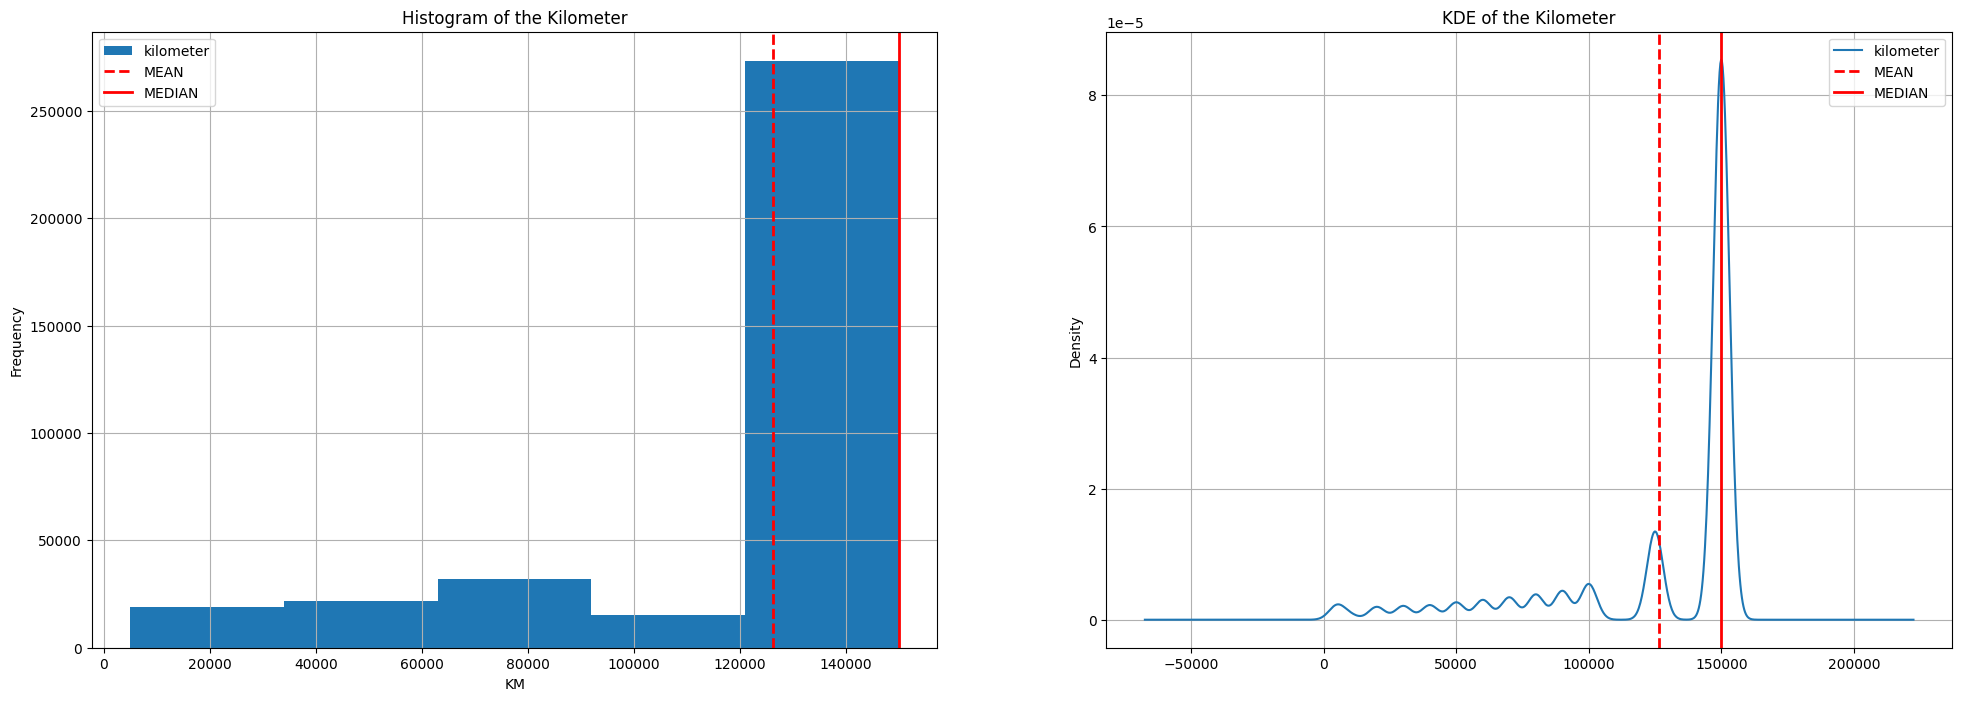

In [17]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# Calculate mean and median of the 'kilometer' column
km_mean = df['kilometer'].mean()
km_median = df['kilometer'].median()

# Plot histogram of the 'kilometer' column
df['kilometer'].plot(kind='hist', bins=5, ax=axes[0], title='Histogram of the Kilometer', xlabel='KM', grid=True)

# Add vertical dashed line representing the mean
axes[0].axvline(km_mean, color='red', linestyle='dashed', linewidth=2, label='MEAN')

# Add vertical solid line representing the median
axes[0].axvline(km_median, color='red', linestyle='solid', linewidth=2, label='MEDIAN')

# Add legend to the histogram plot
axes[0].legend()

# Plot KDE of the 'kilometer' column
df['kilometer'].plot(kind='kde', ax=axes[1], title='KDE of the Kilometer', xlabel='KM', grid=True)

# Add vertical dashed line representing the mean
axes[1].axvline(km_mean, color='red', linestyle='dashed', linewidth=2, label='MEAN')

# Add vertical solid line representing the median
axes[1].axvline(km_median, color='red', linestyle='solid', linewidth=2, label='MEDIAN')

# Add legend to the KDE plot
axes[1].legend()

# Show the plot
plt.show()


In [18]:
print(f"Min. of Kilometer: {Style.BRIGHT}{df['kilometer'].min()}")

print(f"{Style.RESET_ALL}Max. of Kilometer: {Style.BRIGHT}{df['kilometer'].max()}")

Min. of Kilometer: 5000
Max. of Kilometer: 150000


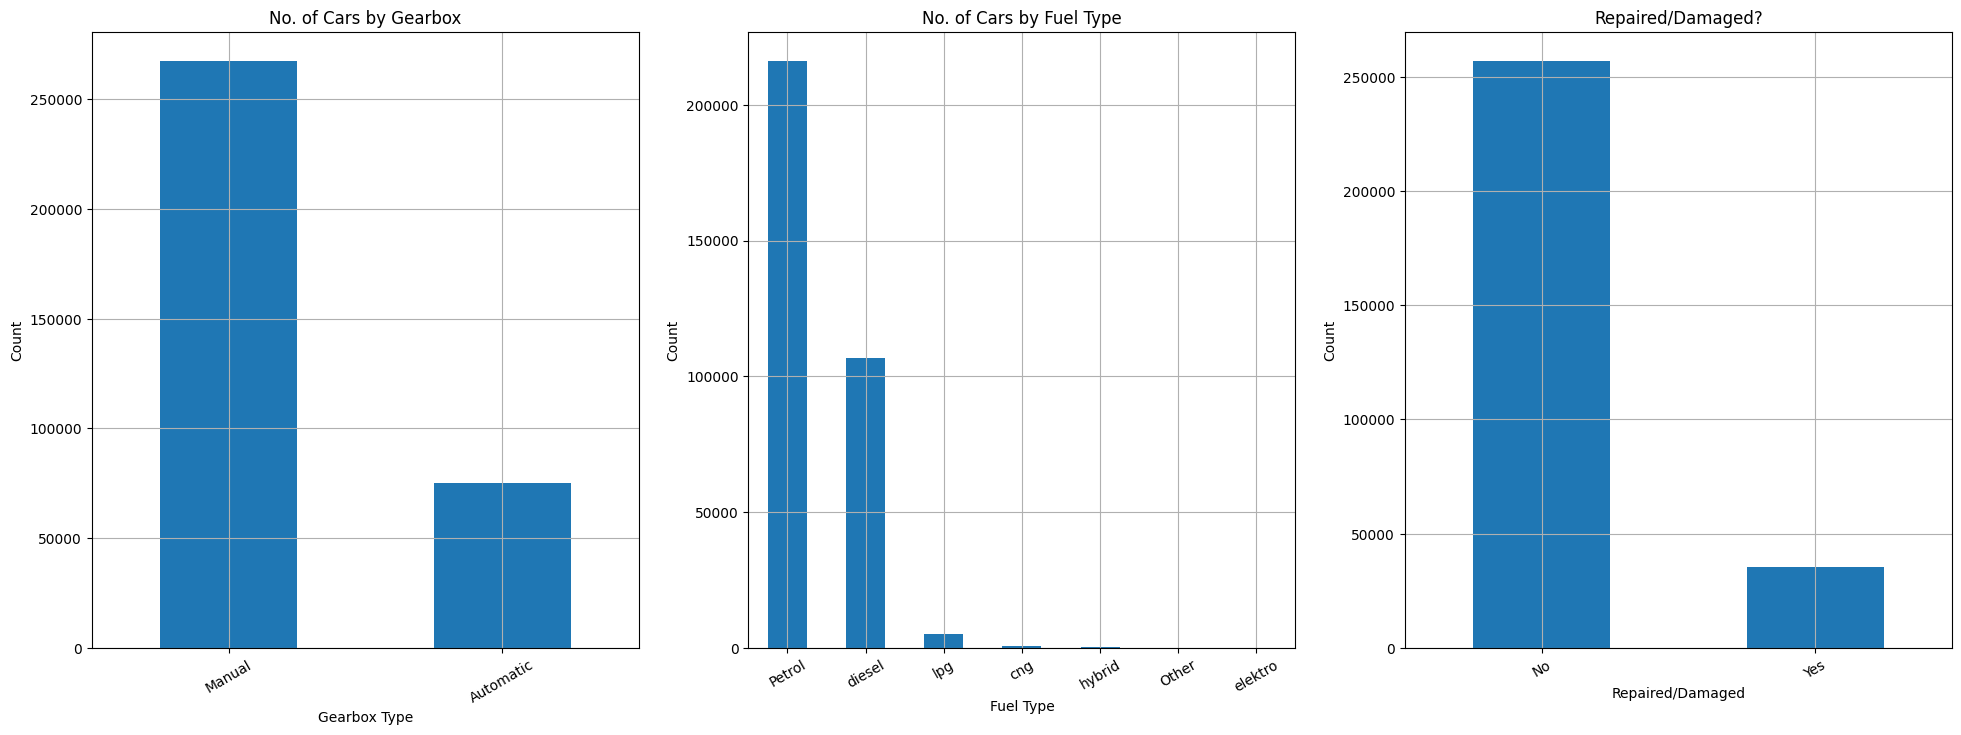

In [19]:
# Create a figure with 1 row and 3 columns, and set the figure size
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

# Plot the count of cars by gearbox type
df['gearbox'].value_counts().plot(kind='bar', ax=axes[0], title='No. of Cars by Gearbox', xlabel='Gearbox Type', ylabel='Count', rot=30, grid=True)

# Plot the count of cars by fuel type
df['fuelType'].value_counts().plot(kind='bar', ax=axes[1], title='No. of Cars by Fuel Type', xlabel='Fuel Type', ylabel='Count', rot=30, grid=True)

# Plot the count of cars by whether they have been repaired or damaged
df['notRepairedDamage'].value_counts().plot(kind='bar', ax=axes[2], title='Repaired/Damaged?', xlabel='Repaired/Damaged', ylabel='Count', rot=30, grid=True)

plt.show()

In [20]:
print(f"No. of cars with a price value higher than 20K: {Style.BRIGHT}{len(df[df['price'] > 20_000])}")
print(f"{Style.RESET_ALL}No. of cars with a price value higher than 30K: {Style.BRIGHT}{len(df[df['price'] > 30_000])}")
print(f"{Style.RESET_ALL}No. of cars with a price value higher than 40K: {Style.BRIGHT}{len(df[df['price'] > 40_000])}")
print(f"{Style.RESET_ALL}Mean of price: {Style.BRIGHT}{df['price'].mean():.2f}{Style.RESET_ALL}, Median of price: {Style.BRIGHT}{df['price'].median()}")
print(f"{Style.RESET_ALL}Min. price: {Style.BRIGHT}{df['price'].min()}{Style.RESET_ALL}, Max. price: {Style.BRIGHT}{df['price'].max()}")

No. of cars with a price value higher than 20K: 16196
No. of cars with a price value higher than 30K: 5383
No. of cars with a price value higher than 40K: 2381
Mean of price: 16487.03, Median of price: 2950.0
Min. price: 0, Max. price: 2147483647


In [21]:
# Calculate percentiles to understand the distribution of prices in the dataframe.
ninety_fifth_percentile, fifth_percentile = df['price'].quantile(.95), df['price'].quantile(.05)

# Output the 95th and 5th percentiles to gain insights into the spread of prices.
print("95th percentile:", ninety_fifth_percentile)
print("5th percentile:", fifth_percentile)

95th percentile: 19500.0
5th percentile: 200.0


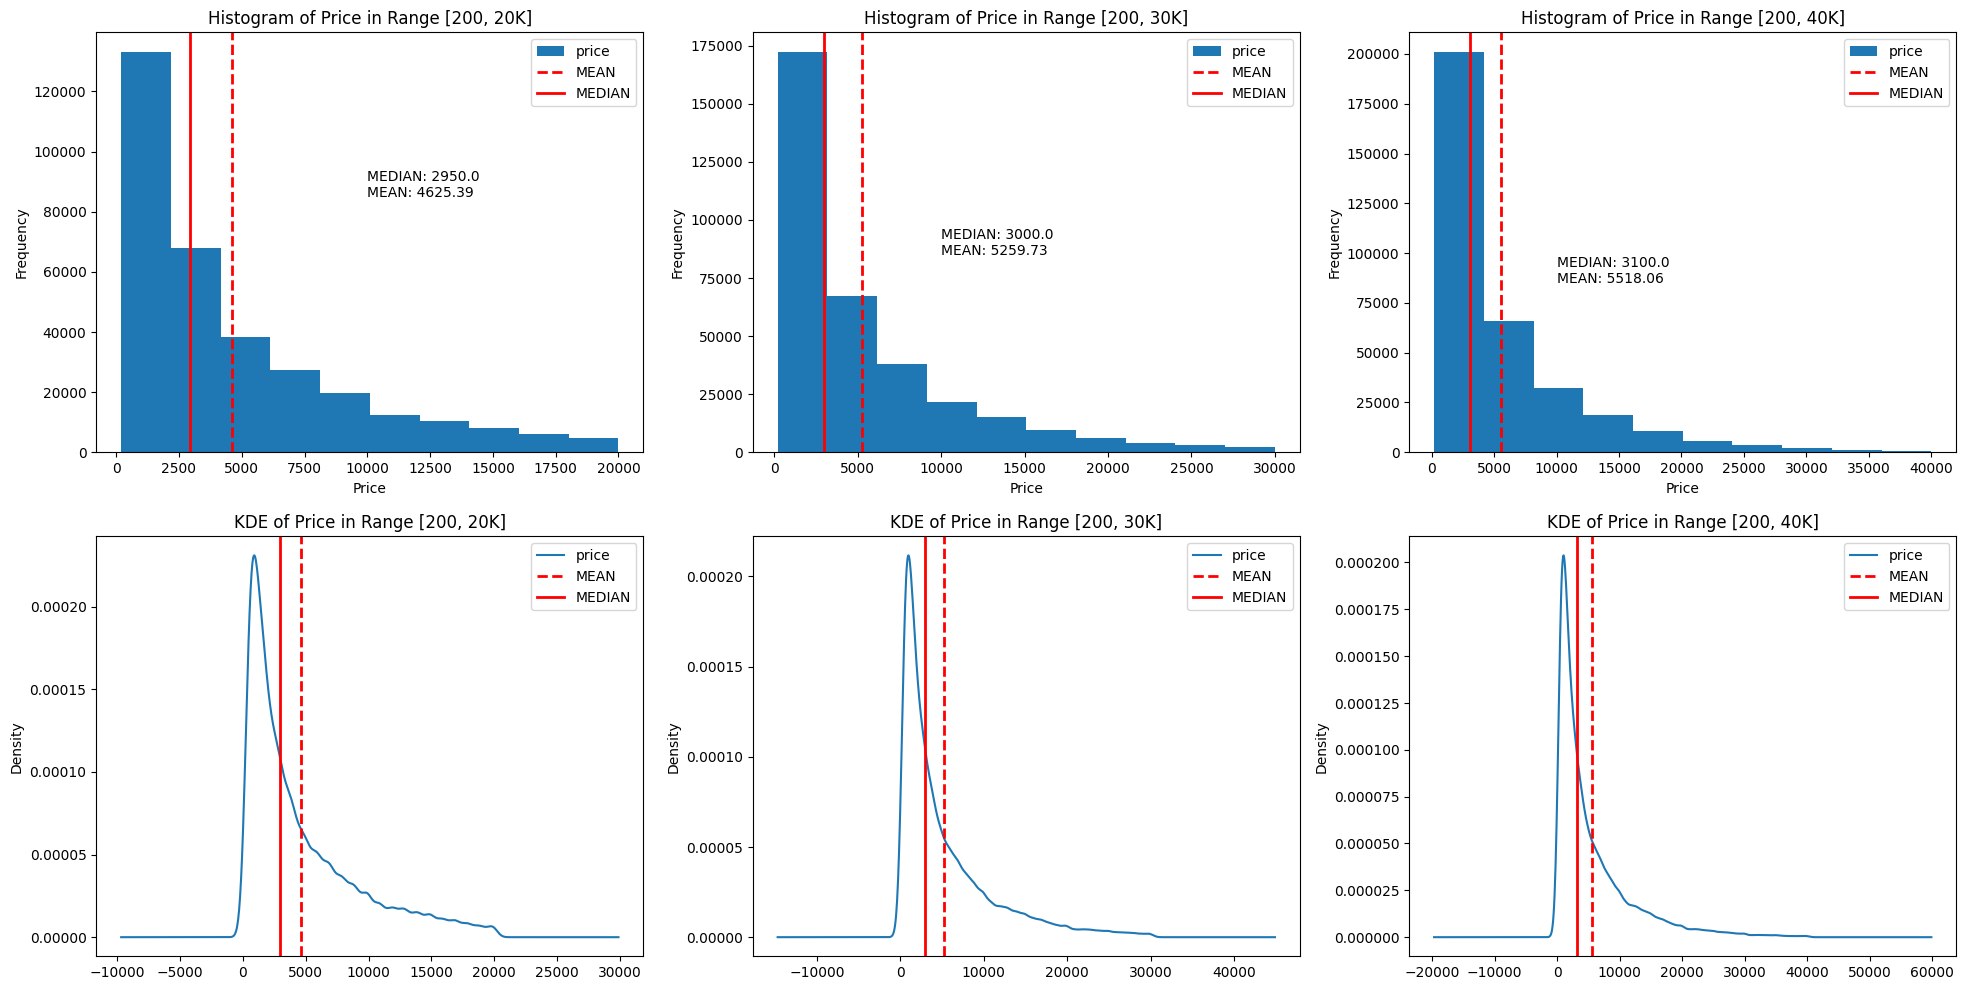

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 12))

bins = 10

price_20 = df.loc[df['price'].between(200, 20_000), 'price']
price_30 = df.loc[df['price'].between(200, 30_000), 'price']
price_40 = df.loc[df['price'].between(200, 40_000), 'price']

price_20.plot(kind='hist', bins=bins, ax=axes[0,0], title='Histogram of Price in Range [200, 20K]', xlabel='Price')
axes[0,0].axvline(price_20.mean(), color='red', linestyle='dashed', linewidth=2, label='MEAN')
axes[0,0].axvline(price_20.median(), color='red', linestyle='solid', linewidth=2, label='MEDIAN')
axes[0,0].legend()
txt = f'MEDIAN: {price_20.median()}\nMEAN: {price_20.mean():.2f}'
axes[0,0].text(10_000, 85_000, txt)

price_30.plot(kind='hist', bins=bins, ax=axes[0,1], title='Histogram of Price in Range [200, 30K]', xlabel='Price')
axes[0,1].axvline(price_30.mean(), color='red', linestyle='dashed', linewidth=2, label='MEAN')
axes[0,1].axvline(price_30.median(), color='red', linestyle='solid', linewidth=2, label='MEDIAN')
axes[0,1].legend()
txt = f'MEDIAN: {price_30.median()}\nMEAN: {price_30.mean():.2f}'
axes[0,1].text(10_000, 85_000, txt)

price_40.plot(kind='hist', bins=bins, ax=axes[0,2], title='Histogram of Price in Range [200, 40K]', xlabel='Price')
axes[0,2].axvline(price_40.mean(), color='red', linestyle='dashed', linewidth=2, label='MEAN')
axes[0,2].axvline(price_40.median(), color='red', linestyle='solid', linewidth=2, label='MEDIAN')
axes[0,2].legend()
txt = f'MEDIAN: {price_40.median()}\nMEAN: {price_40.mean():.2f}'
axes[0,2].text(10_000, 85_000, txt)

price_20.plot(kind='kde', ax=axes[1,0], title='KDE of Price in Range [200, 20K]', xlabel='Price')
axes[1,0].axvline(price_20.mean(), color='red', linestyle='dashed', linewidth=2, label='MEAN')
axes[1,0].axvline(price_20.median(), color='red', linestyle='solid', linewidth=2, label='MEDIAN')
axes[1,0].legend()

price_30.plot(kind='kde', ax=axes[1,1], title='KDE of Price in Range [200, 30K]', xlabel='Price')
axes[1,1].axvline(price_30.mean(), color='red', linestyle='dashed', linewidth=2, label='MEAN')
axes[1,1].axvline(price_30.median(), color='red', linestyle='solid', linewidth=2, label='MEDIAN')
axes[1,1].legend()

price_40.plot(kind='kde', ax=axes[1,2], title='KDE of Price in Range [200, 40K]', xlabel='Price')
axes[1,2].axvline(price_40.mean(), color='red', linestyle='dashed', linewidth=2, label='MEAN')
axes[1,2].axvline(price_40.median(), color='red', linestyle='solid', linewidth=2, label='MEDIAN')
axes[1,2].legend()

plt.show()

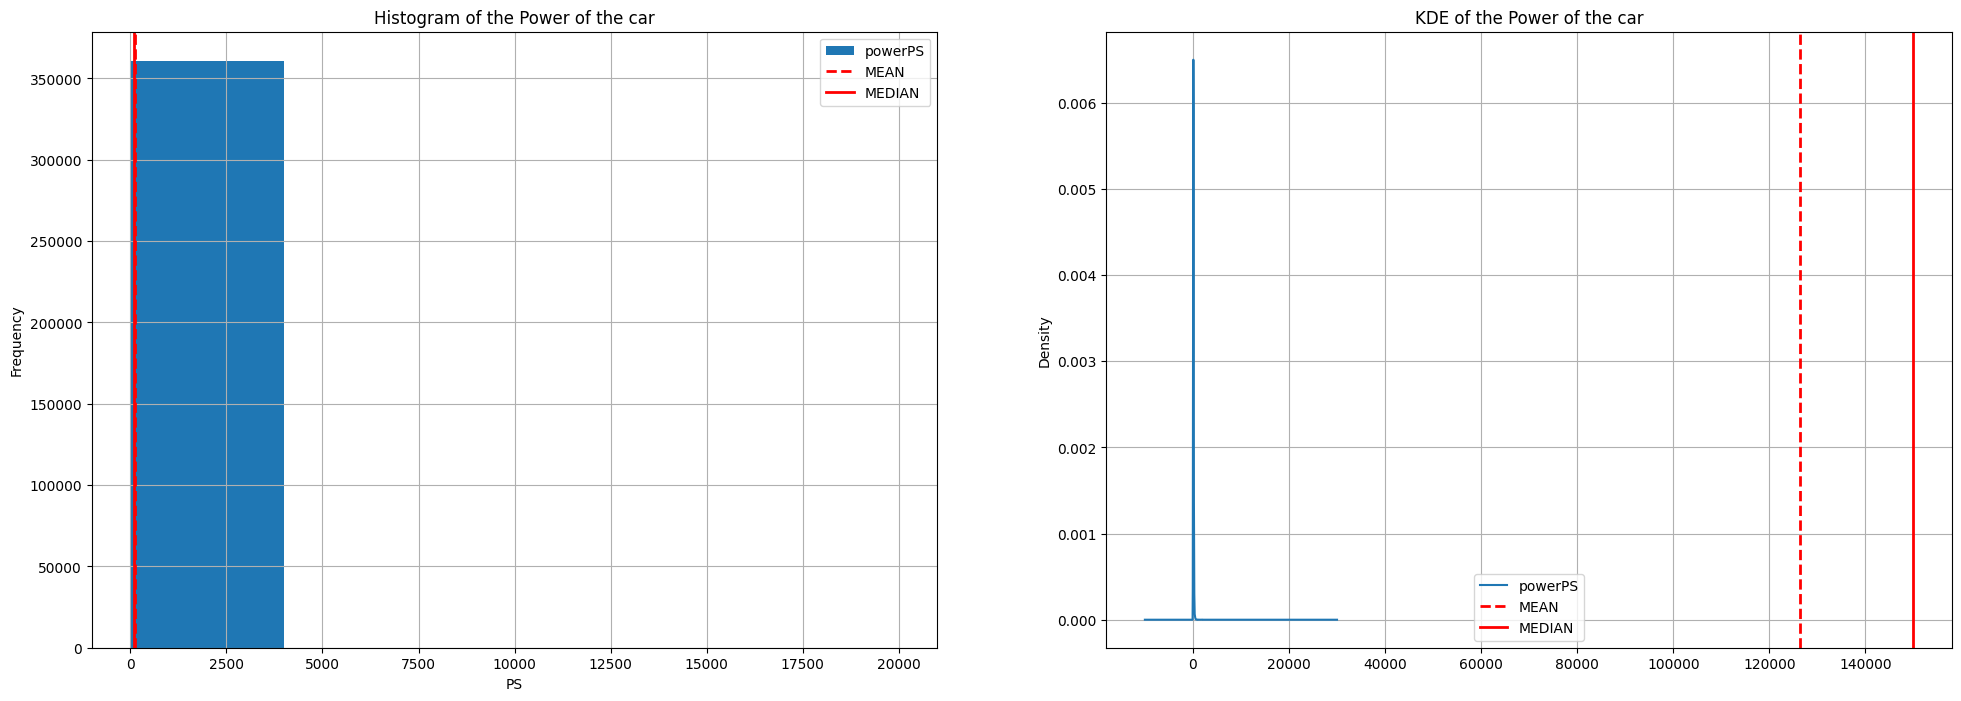

In [23]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# Calculate mean and median of the 'powerPS' column
ps_mean = df['powerPS'].mean()
ps_median = df['powerPS'].median()

# Plot histogram of the 'powerPS' column
df['powerPS'].plot(kind='hist', bins=5, ax=axes[0], title='Histogram of the Power of the car', xlabel='PS', grid=True)

# Add vertical dashed line representing the mean
axes[0].axvline(ps_mean, color='red', linestyle='dashed', linewidth=2, label='MEAN')

# Add vertical solid line representing the median
axes[0].axvline(ps_median, color='red', linestyle='solid', linewidth=2, label='MEDIAN')

# Add legend to the histogram plot
axes[0].legend()

# Plot KDE of the 'kilometer' column
df['powerPS'].plot(kind='kde', ax=axes[1], title='KDE of the Power of the car', xlabel='PS', grid=True)

# Add vertical dashed line representing the mean
axes[1].axvline(km_mean, color='red', linestyle='dashed', linewidth=2, label='MEAN')

# Add vertical solid line representing the median
axes[1].axvline(km_median, color='red', linestyle='solid', linewidth=2, label='MEDIAN')

# Add legend to the KDE plot
axes[1].legend()

# Show the plot
plt.show()

In [24]:
print(f"Min. of the Power of the car: {Style.BRIGHT}{df['powerPS'].min()}")

print(f"{Style.RESET_ALL}Max. of the Power of the car: {Style.BRIGHT}{df['powerPS'].max()}")

print(f"{Style.RESET_ALL}No. of cars with a Power value higher than 1k: {Style.BRIGHT}{len(df[df['price'] > 1000])}")

Min. of the Power of the car: 0
Max. of the Power of the car: 20000
No. of cars with a Power value higher than 1k: 275360


In [25]:
# Copy the DataFrame to avoid SettingWithCopyWarning
df_copy = df.copy()

# Drop rows with missing values in the copied DataFrame
df_copy.dropna(inplace=True)

# Assign the modified DataFrame back to the original variable
df = df_copy

# Filter data based on price range
df = df[df['price'].between(200, 20_000)]

# Filter data based on power range
df = df[(df['powerPS'] > 0) & (df['powerPS'] <= 1000)]

# Calculate the age of vehicles
current_year = 2024
df['age'] = current_year - df['yearOfRegistration']

# Drop unnecessary columns
df.drop(['postalCode', 'dateCreated', 'name', 'monthOfRegistration', 'yearOfRegistration'], axis=1, inplace=True)

# Filter out rows with fuelType 'Other'
df = df[df['fuelType'] != 'Other']

# Filter out rows with notRepairedDamage 'NaN'
df = df[df['notRepairedDamage'] != 'NaN']

# Encode categorical features using LabelEncoder
categorical_features = ['vehicleType', 'fuelType', 'brand', 'model', 'abtest', 'notRepairedDamage', 'gearbox']
le = LabelEncoder()

# Iterate over each categorical feature and encode it
for categorical_feature in categorical_features:
    df[categorical_feature] = le.fit_transform(df[categorical_feature])    
df.head()

df_index  price  abtest  vehicleType  gearbox  powerPS  model  kilometer  \
3          3   1500       1            4        1       75    117     150000   
4          4   3600       1            4        1       69    102      90000   
5          5    650       1            6        1      102     11     150000   
6          6   2200       1            2        1      109      8     150000   
10        10   2000       0            6        1      105     10     150000   

    fuelType  brand  notRepairedDamage  age  
3          0     37                  0   23  
4          2     31                  0   16  
5          0      2                  1   29  
6          0     25                  0   20  
10         0     19                  0   20

In [26]:
#check the correlation of the data
df.corr()

df_index     price    abtest  vehicleType   gearbox  \
df_index           1.000000 -0.003100 -0.000804     0.000886 -0.000955   
price             -0.003100  1.000000 -0.000981     0.007683 -0.252982   
abtest            -0.000804 -0.000981  1.000000     0.001175  0.000073   
vehicleType        0.000886  0.007683  0.001175     1.000000 -0.105133   
gearbox           -0.000955 -0.252982  0.000073    -0.105133  1.000000   
powerPS           -0.000209  0.504914 -0.005533     0.148701 -0.428765   
model              0.000858 -0.011166  0.003249    -0.194319  0.050831   
kilometer          0.002271 -0.413263 -0.003300     0.049920 -0.028779   
fuelType           0.001529  0.236546 -0.002233     0.020212 -0.158811   
brand              0.001436 -0.108996  0.005389    -0.122022  0.108166   
notRepairedDamage  0.003094 -0.208859 -0.002377     0.001189  0.016500   
age                0.001215 -0.684554 -0.000032     0.031160  0.061344   

                    powerPS     model  kilometer  fuelType     brand  \
df_index          -0.000209  0.000858   0.002271  0.001529  0.001436   
price              0.504914 -0.011166  -0.413263  0.236546 -0.108996   
abtest            -0.005533  0.003249  -0.003300 -0.002233  0.005389   
vehicleType        0.148701 -0.194319   0.049920  0.020212 -0.122022   
gearbox           -0.428765  0.050831  -0.028779 -0.158811  0.108166   
powerPS            1.000000 -0.150390   0.113961  0.210207 -0.325260   
model             -0.150390  1.000000  -0.033109  0.025974  0.498253   
kilometer          0.113961 -0.033109   1.000000  0.170411 -0.057850   
fuelType           0.210207  0.025974   0.170411  1.000000 -0.049054   
brand             -0.325260  0.498253  -0.057850 -0.049054  1.000000   
notRepairedDamage -0.042113 -0.000930   0.091092 -0.017128 -0.006140   
age               -0.140943 -0.046015   0.483062 -0.236817  0.011517   

                   notRepairedDamage       age  
df_index                    0.003094  0.001215  
price                      -0.208859 -0.684554  
abtest                     -0.002377 -0.000032  
vehicleType                 0.001189  0.031160  
gearbox                     0.016500  0.061344  
powerPS                    -0.042113 -0.140943  
model                      -0.000930 -0.046015  
kilometer                   0.091092  0.483062  
fuelType                   -0.017128 -0.236817  
brand                      -0.006140  0.011517  
notRepairedDamage           1.000000  0.137395  
age                         0.137395  1.000000

In [27]:
# Import necessary library
from sklearn.preprocessing import StandardScaler

# Extract features (independent variables) by dropping the target variable 'price'
features = df.drop(['price'], axis=1)

# Extract target variable (dependent variable) 'price'
target = df['price']

# Create a StandardScaler object
scaler = StandardScaler()

# Specify the numerical features you want to scale
numerical_features = ['kilometer', 'powerPS', 'age']

# Apply standardization to the numerical features
# Note: The fit_transform method both fits the scaler to the data and transforms it in a single step
features[numerical_features] = scaler.fit_transform(features[numerical_features])

# Display the first few rows of the DataFrame after feature scaling
features.head()


df_index  abtest  vehicleType  gearbox   powerPS  model  kilometer  \
3          3       1            4        1 -0.904241    117   0.619166   
4          4       1            4        1 -1.015733    102  -1.007689   
5          5       1            6        1 -0.402528     11   0.619166   
6          6       1            2        1 -0.272455      8   0.619166   
10        10       0            6        1 -0.346783     10   0.619166   

    fuelType  brand  notRepairedDamage       age  
3          0     37                  0  0.492486  
4          2     31                  0 -0.853948  
5          0      2                  1  1.646572  
6          0     25                  0 -0.084557  
10         0     19                  0 -0.084557

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# The 'features.values' represent the input features converted to a NumPy array
# The 'target.values' represent the target variable (output) converted to a NumPy array
# The test set will contain 20% of the data, and the training set will contain the remaining 80%
# The 'random_state=0' ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, test_size=0.2, random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Train the models and calculate R2 scores
print(Back.RED + Fore.BLACK + Style.BRIGHT + ' STARTING THE PROCESS...')
print(Back.RESET)
for name, model in models.items():
    print(Fore.LIGHTGREEN_EX + f"\nTraining ({name})...")
    model.fit(X_train, y_train)
    
    print(Fore.LIGHTGREEN_EX + f"Predicting ({name})...")
    predictions = model.predict(X_test)
    
    # Print evaluation scores
    print(f"{Fore.BLUE}{name} R2 Score: {Fore.RED}{r2_score(y_test,predictions):.3f}")
    print(f"{Fore.BLUE}MSE: {Fore.RED}{mean_squared_error(y_test, predictions):.3f}")
    print(f"{Fore.BLUE}MAE: {Fore.RED}{mean_absolute_error(y_test, predictions):.3f}")
    
    print("\n###############################################\n")
